In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten =  x_test.reshape(len(x_test),28*28)
x_train_flatten.shape

(60000, 784)

In [6]:
x_train_flatten2 = x_train.flatten()
x_train_flatten2.shape

(47040000,)

In [7]:
model = keras.Sequential([
    Dense(1024,input_shape=(784,),activation="sigmoid"),
    Dropout(0.1),
    Dense(256,activation='tanh'),
    Dropout(0.1),
    Dense(10,activation="softmax")
    
])
model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.00005),loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=20)

c:\Users\samiu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7496 - loss: 0.8409
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9276 - loss: 0.2517
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9443 - loss: 0.1919
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9540 - loss: 0.1543
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9614 - loss: 0.1310
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9663 - loss: 0.1146
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9718 - loss: 0.0966
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9741 - loss: 0.0851
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9780 - loss: 0.0739
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9785 - loss: 0.0687
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9832 - loss: 0.0592
Epoch 12/20
1875/18

In [8]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.0922


[0.08534281700849533, 0.9746999740600586]

In [9]:
model.save("MODEL_MNIST.keras")

In [10]:
y_pred = model.predict(x_test_flatten)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  77, 254, 107,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

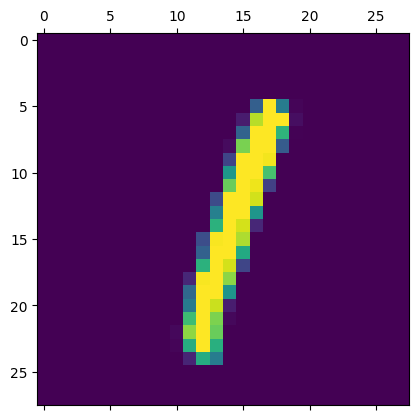

In [11]:
i = 5
plt.matshow(x_test[i])
y_pred_number = [np.argmax(i) for i in y_pred]
# y_pred_number[i]
x_test[i]


In [12]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_number)

Text(95.72222222222221, 0.5, 'Truth')

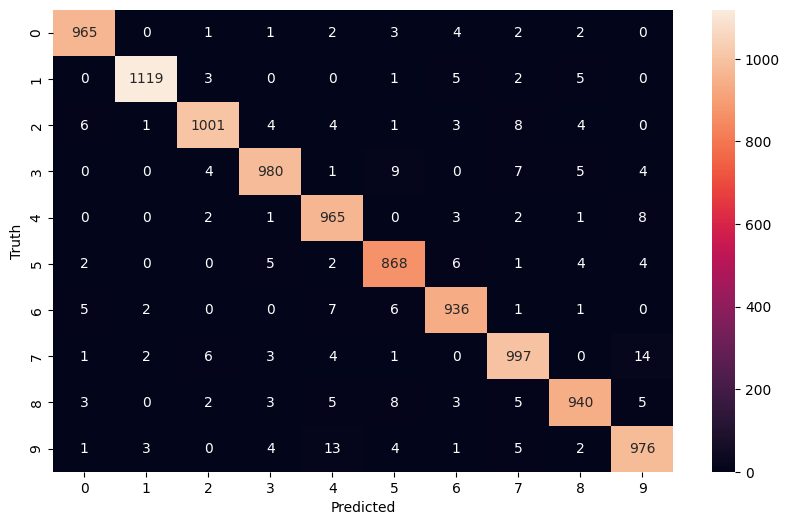

In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')